In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

!tail -30 weatherAUS.csv
df = pd.read_csv("weatherAUS.csv")
print(df.columns[df.isna().any()].tolist())

#print df.iat[3,6] == df.iat[5953,6]
#print pd.isnull(df["Evaporation"][5955:5960]).all()
for item in list(df.columns.values):
    na_len = df[item].isna().sum()
    total_len = df[item].count()
    
    if na_len > 0.7*total_len:
        del df[item]


columns = list(df.columns.values)
col = 0
print df.shape
df.loc[df.index.dropna()]

for index,row in df.iterrows():
    removed = False
    col = 0
    while col < len(columns) and removed == False:
        if row[columns[col]] != row[columns[col]]:
            df.drop(index, inplace=True)
            removed = True
        col = col+1

df.to_csv("ausweather_preprocessed.csv", sep='\t', encoding='utf-8')

 


            
    

 



#print(df[df["Evaporation"] == df["Evaporation"]])
    

2017-05-26,Uluru,14.3,27.6,0.4,NA,NA,WNW,39,NA,NW,0,20,68,27,1020.5,1016.1,4,7,16.1,27.2,No,0,No
2017-05-27,Uluru,9.3,28,0,NA,NA,W,28,SSW,WNW,6,11,36,16,1019.9,1016.9,NA,NA,16.6,27.3,No,0,No
2017-05-28,Uluru,8,24.6,0,NA,NA,E,33,SE,ESE,11,13,46,25,1021.7,1018.8,4,NA,13.8,23.5,No,0,No
2017-05-29,Uluru,12.7,22.2,0,NA,NA,E,37,E,ESE,19,13,59,34,1024.3,1021.7,8,8,13.9,21,No,0,No
2017-05-30,Uluru,9.4,22.7,0,NA,NA,E,35,SE,E,13,17,62,32,1026.6,1023.6,8,4,11.8,22.3,No,0,No
2017-05-31,Uluru,5.4,20.5,0,NA,NA,E,46,E,E,20,28,56,32,1029.2,1025.3,NA,NA,11.1,20.2,No,0,No
2017-06-01,Uluru,5.6,19.4,0,NA,NA,E,43,E,ESE,22,24,61,22,1029.6,1027.1,NA,NA,9.7,18.3,No,0,No
2017-06-02,Uluru,1.5,19.2,0,NA,NA,E,37,ESE,ESE,17,22,45,18,1030.7,1026.7,NA,NA,6.8,17.6,No,0,No
2017-06-03,Uluru,3.8,19.8,0,NA,NA,ENE,39,ESE,E,19,17,42,22,1028.7,1024.1,NA,NA,8.6,18.9,No,0,No
2017-06-04,Uluru,4.5,18.8,0,NA,NA,E,31,ESE,E,13,15,42,26,1026.9,1022.4,NA,NA,9.5,18.6,No,0,No
2017-06-05,Uluru,4.9,20.7,0,NA,NA,E,37,ESE,ESE,17,24,38,11,

<Figure size 1800x1080 with 0 Axes>

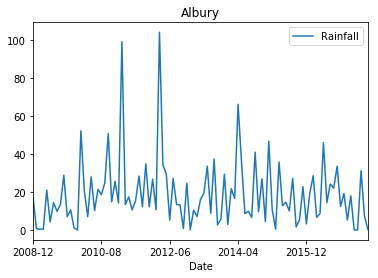

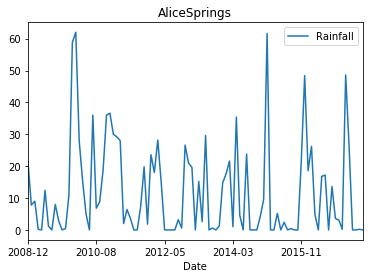

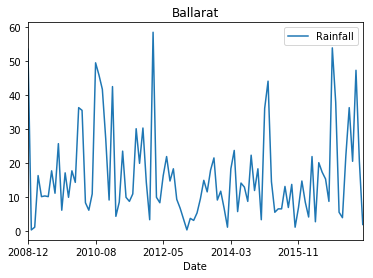

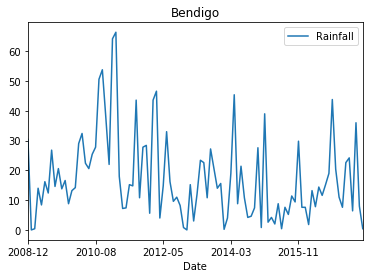

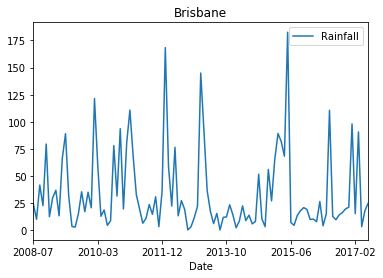

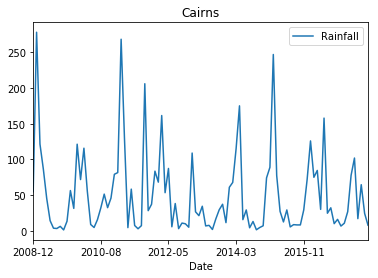

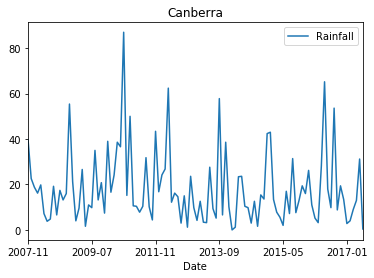

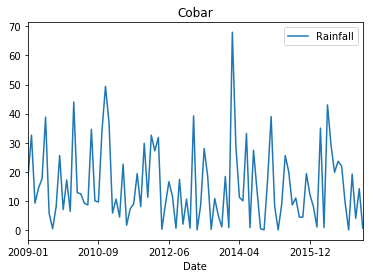

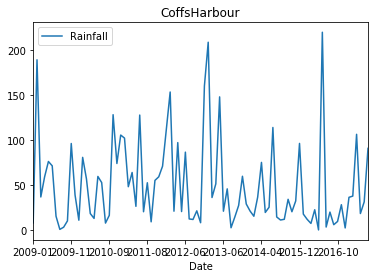

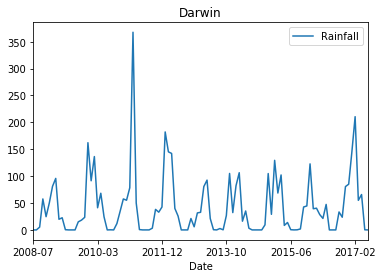

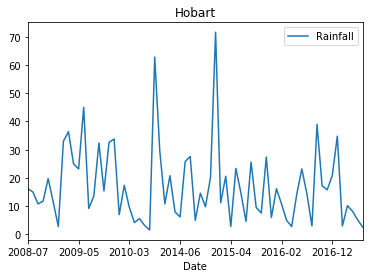

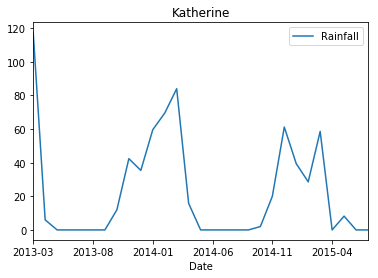

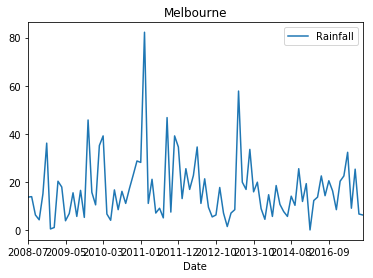

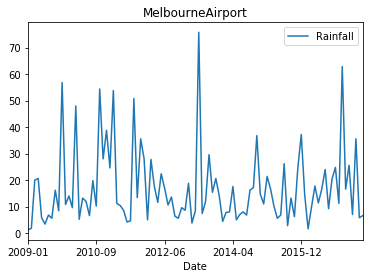

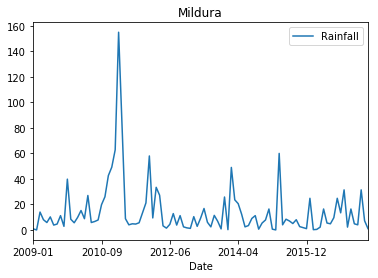

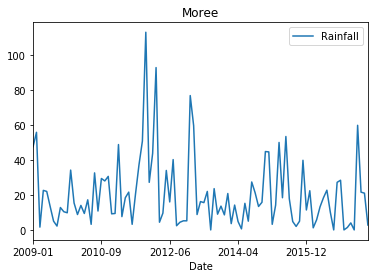

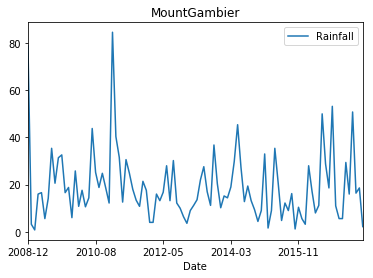

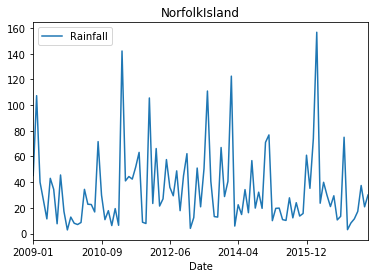

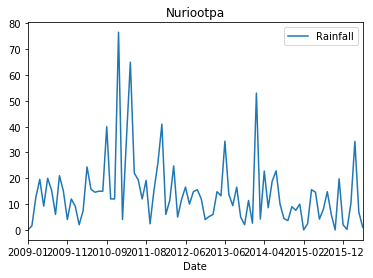

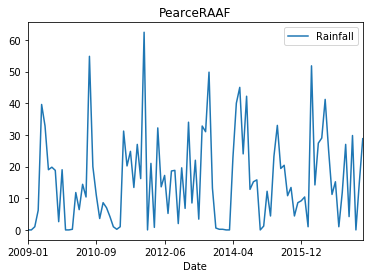

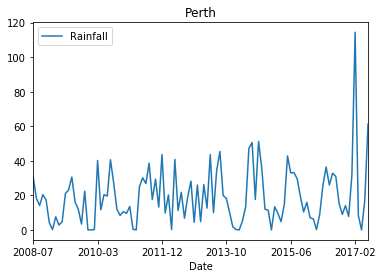

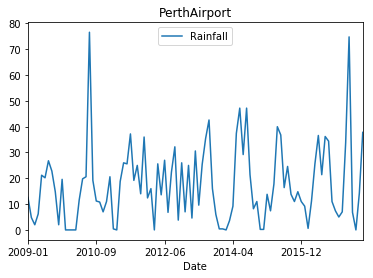

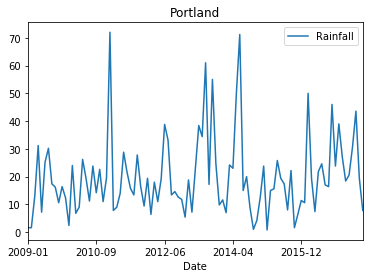

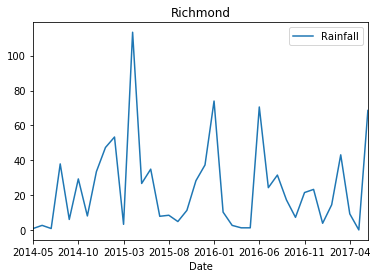

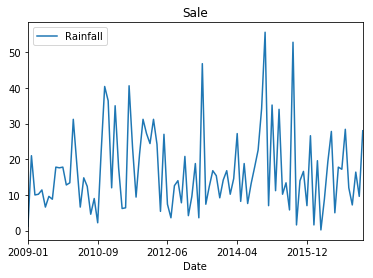

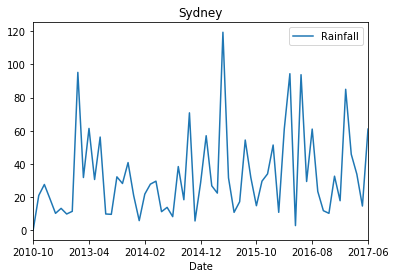

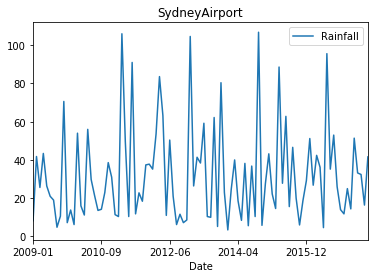

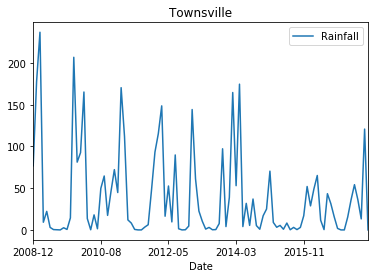

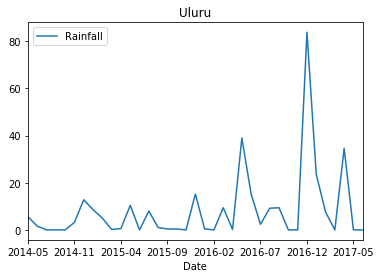

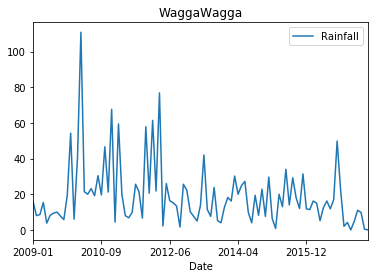

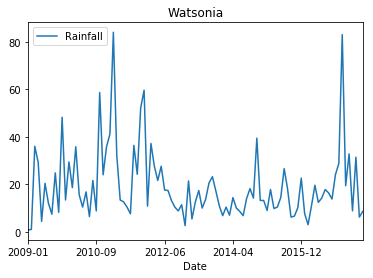

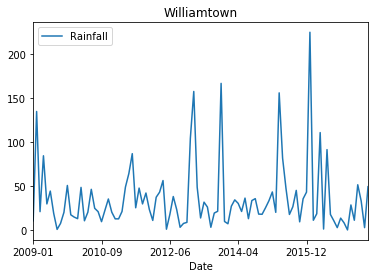

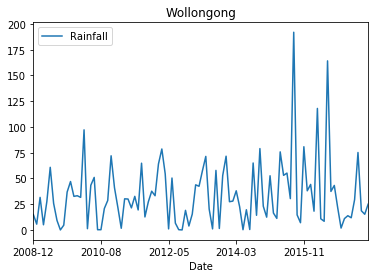

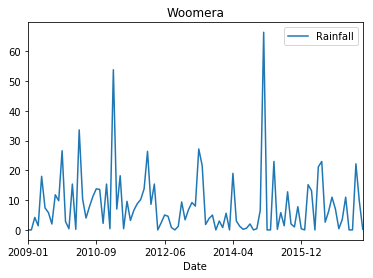

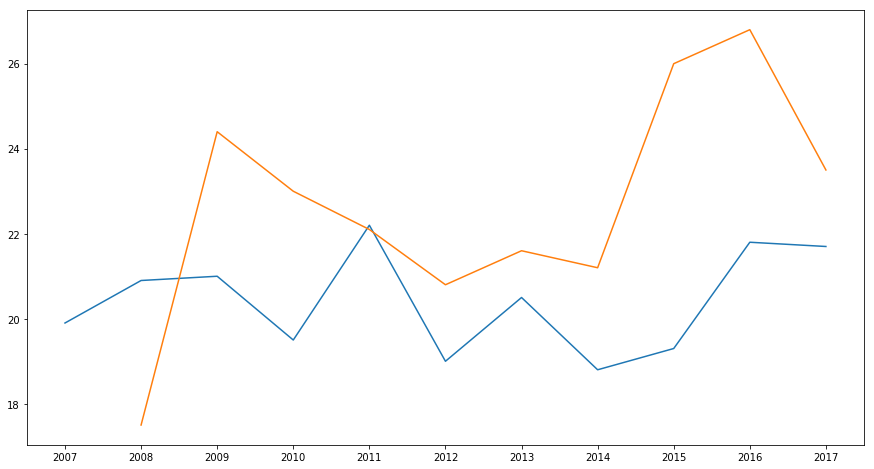

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("ausweather_preprocessed.csv",sep="\t")


location_grouped_means = df.groupby('Location').mean()
location_grouped_max = df.groupby('Location').max()
location_grouped_min = df.groupby('Location').min()
grouped_by_month_rainfall = df.groupby([df.Date.str[:7],"Location"])["Location","Rainfall"].max().reset_index()

grouped_by_year_rainfall = df.groupby([df.Date.str[:4],"Location"])["Location","MinTemp"].max().reset_index()

df1 = grouped_by_year_rainfall.groupby(["Location","Date"]).max().reset_index()

plt.figure(figsize=(25,15))

df = grouped_by_month_rainfall
#fig,ax=plt.subplots()
#print "REACH"

#grouped_by_month_rainfall.groupby("Location").plot(x="Date", y="Rainfall")
#TRY SUBLPLOTS
for title, group in df.groupby('Location'):
    group.plot(x='Date', y='Rainfall', title=title)

x_values = df1[df1["Location"]=="Albury"]
y_values = df1[df1["Location"]=="Canberra"]

plt.figure(figsize=(15,8))
plt.plot(y_values["Date"],y_values["MinTemp"])
plt.plot(x_values["Date"],x_values["MinTemp"])

